IMPORT THE LIBRARIES

In [39]:
#get the librariees
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression,Ridge
from category_encoders import OneHotEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline

CREATE A WRANGLE FUNCTION

In [2]:
#create the function
def wrangle(filepath):
    
    #load the dataset
    df = pd.read_excel(filepath)
    
    #delete low caridnality values
    df = df.drop(columns=['laptop_ID'])
    
    #apply the mask for our prices
    low, high = df["Price_euros"].quantile([0.1,0.9])
    #between 10 and 90 quantiles
    mask = df["Price_euros"].between(low,high)
    #apply the filter
    df = df[mask]
    
    #aggregate categorical columns (company)
    company_cat = {"Dell":"Dell",
              "Lenovo":"Lenovo",
              "HP":"HP",
               "Asus":"Others",
              "Acer":"Acer_Tosh_M",
              "Toshiba":"Acer_Tosh_M",
              "MSI":"Acer_Tosh_M",
              "Apple":"Others",
              "Samsung":"Others",
              "Microsoft":"Others",
              "Xiaomi":"Others",
              "Fujitsu":"Others",
              "Google":"Others",
              "Razer":"Others",
              "Huawei":"Others",
              "LG":"Others",
              "Chuwi":"Others"}
    #apply the filter
    df['Company'] = [company_cat[x] for x in df['Company']]
    
    #aggregare  ram categories
    ram_cat = {"8GB":"8GB",
                  "4GB":"4-6GB",
                  "6GB":"4-6GB",
                   "12GB":"12+GB",
                  "16GB":"12+GB",
                  "24GB":"12+GB",
                  "32GB":"12+GB",
                  }
        #apply the filter
    df['Ram'] = [ram_cat[x] for x in df['Ram']]
      
    #return the dataframe
    return df

In [3]:
#load the dataset using the wrangle function
df = wrangle(r"C:\Users\IFB19-039\Desktop\machine learning\laptop_price.xlsx")
print(df.shape)
df.head()

(1041, 12)


,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Others,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Others,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
4,Others,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
5,Acer_Tosh_M,Aspire 3,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4-6GB,500GB HDD,AMD Radeon R5,Windows 10,2.1kg,400.00


DATA EEXPLORATION

DATA VISUALIZATION


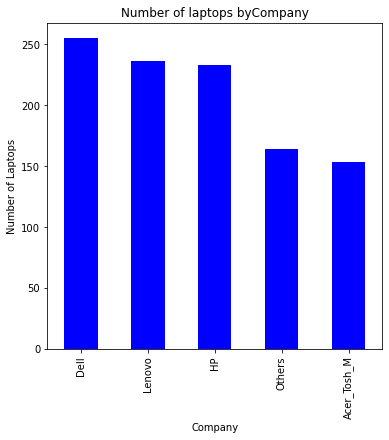

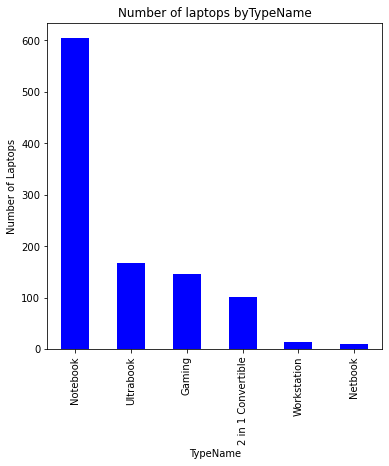

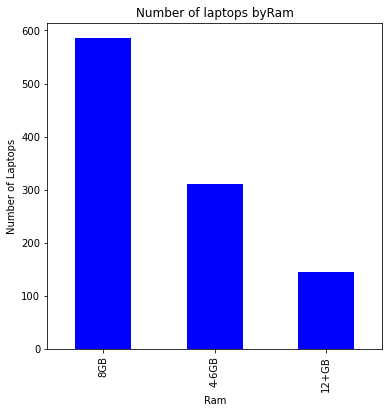

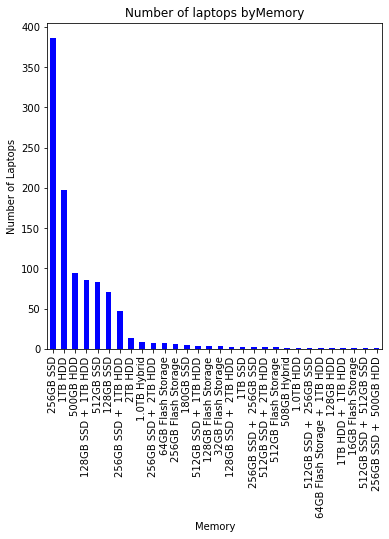

In [4]:
#create a bar chart to plot the distribution of cat values
def plot_bars(df, cols):
    for col in cols:
        fig = plt.figure(figsize=(6,6)) # define plot area
        ax = fig.gca() # define axis    
        counts = df[col].value_counts() # find the counts for each unique category
        counts.plot.bar(ax = ax, color = 'blue') # Use the plot.bar method on the counts data frame
        ax.set_title('Number of laptops by' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel('Number of Laptops')# Set text for y axis
        plt.show()

plot_cols = ['Company','TypeName','Ram','Memory']
plot_bars(df, plot_cols)    

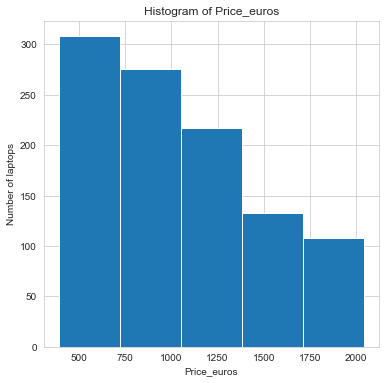

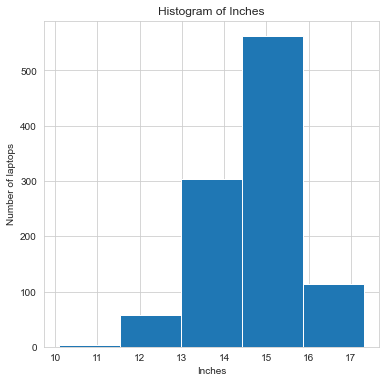

In [73]:
#plot histogram for numeric data
def plot_histogram(df, cols, bins = 5):
    for col in cols:
        fig = plt.figure(figsize=(6,6)) # define plot area
        ax = fig.gca() # define axis    
        df[col].plot.hist(ax = ax, bins = bins) # Use the plot.hist method on subset of the data frame
        ax.set_title('Histogram of ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel('Number of laptops')# Set text for y axis
        plt.show()
        
num_cols = ['Price_euros', 'Inches']    
plot_histogram(df, num_cols)

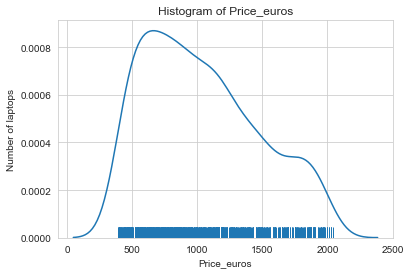

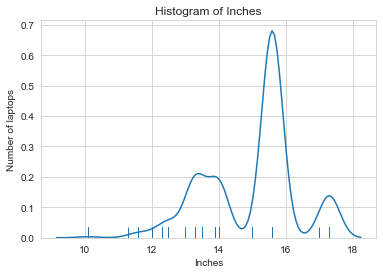

In [6]:
#kernel density plots
def plot_density_hist(df, cols, bins = 10, hist = False):
    for col in cols:
        sns.set_style("whitegrid")
        sns.distplot(df[col], bins = bins, rug=True, hist = hist)
        plt.title('Histogram of ' + col) # Give the plot a main title
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel('Number of laptops')# Set text for y axis
        plt.show()
        
plot_density_hist(df, num_cols)        

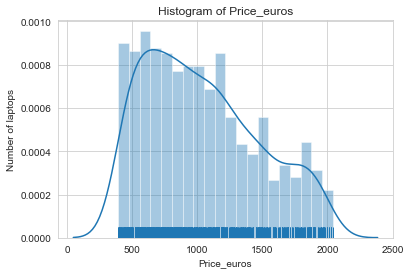

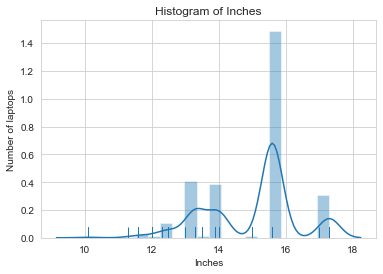

In [7]:
#combine histograms and kdes
plot_density_hist(df, num_cols, bins = 20, hist = True)       

In [8]:
df.head(3)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Others,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Others,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00


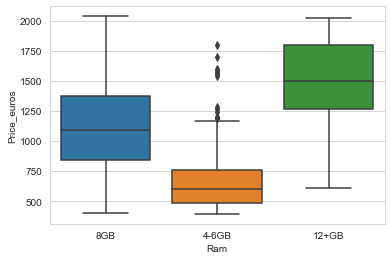

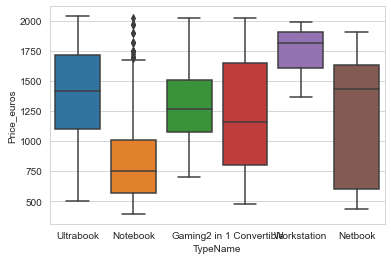

In [9]:
#relationship between categorical features and numeric features
def plot_box(df, cols, col_y = 'Price_euros'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot(col, col_y, data=df)
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.show()
        
cat_cols = ['Ram','TypeName']
            
plot_box(df, cat_cols) 

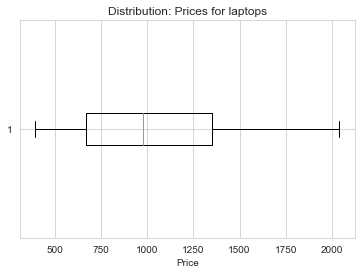

In [10]:
#plot a boxplot for price
plt.boxplot(df["Price_euros"],vert=False)
plt.title("Distribution: Prices for laptops")
plt.xlabel("Price");

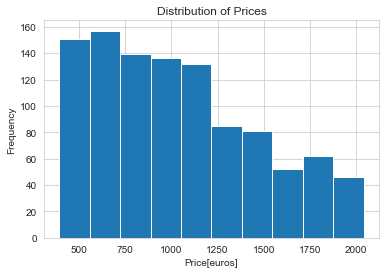

In [11]:
plt.hist(df["Price_euros"])
plt.xlabel("Price[euros]")
plt.ylabel("Frequency")
plt.title("Distribution of Prices");

In [12]:
#aggregate columns!!!!
df["TypeName"].unique()

array(['Ultrabook', 'Notebook', 'Gaming', '2 in 1 Convertible',
       'Workstation', 'Netbook'], dtype=object)

SPLIT THE DATA

In [117]:
target = "Price_euros"
features = ["Ram","TypeName","Company","Inches",
            "OpSys","Memory","Cpu","ScreenResolution","Gpu","Weight"]
y_train = df[target]
X_train = df[features]
#print the shape
print("y_shape:",y_train.shape)
print()
print("X_train",X_train.shape)

y_shape: (1041,)

X_train (1041, 10)


BASELINE FOR THE MODEL


In [126]:
y_mean = y_train.mean()
y_pred_baseline = [y_mean] * len(y_train)
print("Mean laptop price:",round(y_mean,2))
print("Baseline MAE:", round(mean_absolute_error(y_train,y_pred_baseline)))

Mean laptop price: 1038.13
Baseline MAE: 366.0


ITERATE

BUILD MODEL

In [133]:
model = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    LinearRegression()

)
#fit the model
model.fit(X_train,y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['Ram', 'TypeName', 'Company', 'OpSys',
                                     'Memory', 'Cpu', 'ScreenResolution', 'Gpu',
                                     'Weight'],
                               use_cat_names=True)),
                ('linearregression', LinearRegression())])

EVALUATE THE MODEL

In [134]:
y_pred_training = model.predict(X_train)
mae_train = mean_absolute_error(y_train,y_pred_training)
print("Training MAE:",round(mae_train))

Training MAE: 90.0


COMMUNICATE THE RESULTS

In [146]:
#extract the model intercept and the coefficients
intercept = model.named_steps["linearregression"].intercept_
coefficient = model.named_steps["linearregression"].coef_
#print the intecept and the coefficients
print("Model Intercept:",round(intercept))

Model Intercept: 1157.0


In [153]:
#extract the feature names
feature_names = model.named_steps["onehotencoder"].get_feature_names()
print("features len:",len(feature_names))
#print first 5 features from the names
print("feature_")

features len: 426
feature_


In [155]:
#create a feature importance series
feat_imp = pd.Series(coefficient,index=feature_names)
feat_imp.head()

Ram_8GB               -11.480305
Ram_4-6GB            -112.594796
Ram_12+GB             124.075102
TypeName_Ultrabook     29.040604
TypeName_Notebook     -10.013440
dtype: float64